<a href="https://colab.research.google.com/github/NakulSiwach/OceanWaterTempAnalysisAndPrediction/blob/main/Nakul_CalCOFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                            Mini project (Team 35, Project 4)

#### Nakul Siwach (MT2024096)
#### Jainish Parmar (MT2024065)
#### Raj kanani (MT2024074)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing all the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
# loading the dataset

bottle_df = pd.read_csv('/content/drive/MyDrive/CalCOFI_Dataset/bottle.csv')
bottle_df.head()

<ipython-input-3-e5fa4218dfe7>:3: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle_df = pd.read_csv('/content/drive/MyDrive/CalCOFI_Dataset/bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [ ]:
# studying the dataset, it's shape, number of null values in each feature column,
# name of columns, statistical summary, number of unique values in each column

print(bottle_df.shape)
print(bottle_df.isnull().sum())
bottle_df.describe()
print(bottle_df.columns)
bottle_df.nunique()

(864863, 74)
Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2

,0
Cst_Cnt,34404
Btl_Cnt,864863
Sta_ID,2634
Depth_ID,864850
Depthm,3219
...,...
TA1,1849
TA2,225
pH2,10
pH1,82


In [ ]:
# removing ID columns (they do not contribute towards our model)

bottle_df.drop(['Sta_ID','Depth_ID'],axis=1,inplace=True)

In [ ]:
# # finding all the categorical columns

# categorical_column1 = list(set(bottle_df. columns) - set(bottle_df. describe(). columns))
# categorical_column1

## Data Preprocessing

In [ ]:
# # dropping all the categorical columns (we are using regression)

# print(bottle_df.shape)
# bottle_df = bottle_df.drop(categorical_column1, axis=1)
# bottle_df.shape

In [ ]:
# removing all the columns that have more than 20% null values

print(bottle_df.isnull().sum())
print(bottle_df.shape)


bottle_df.isnull().sum()
for col in bottle_df.columns:
  if bottle_df[col].isnull().sum() >= len(bottle_df)*0.10:
    bottle_df.drop(col,inplace=True,axis=1)


print(bottle_df.isnull().sum())
print(bottle_df.shape)

Cst_Cnt                     0
Btl_Cnt                     0
Depthm                      0
T_degC                  10963
Salnty                  47354
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 72, dtype: int64
(864863, 72)
Cst_Cnt           0
Btl_Cnt           0
Depthm            0
T_degC        10963
Salnty        47354
STheta        52689
RecInd            0
T_prec        10963
S_prec        47354
NH3q          56564
C14A1q        16258
C14A2q        16240
DarkAq        24423
MeanAq        24424
R_Depth           0
R_TEMP        10963
R_POTEMP      46047
R_SALINITY    47354
R_SIGMA       52856
R_SVA         52771
R_DYNHT       46657
R_PRES            0
dtype: int64
(864863, 22)


In [ ]:
bottle_df=bottle_df.dropna(subset=['T_degC'])
bottle_df.shape

(853900, 22)

In [ ]:
# removing every row that has null value in it's any feature
# we could have done fillna but we have already big dataset

bottle_df = bottle_df.dropna()
bottle_df.shape

(733418, 22)

In [ ]:
# from sklearn.impute import SimpleImputer
# X = bottle_df
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(X)
# imputer.transform(X)
# print(X.isnull().sum())

In [ ]:
# doing scaling manually (min-max scaler)

print(bottle_df.head())

columns_to_normalize = [col for col in bottle_df.columns if bottle_df[col].nunique() > 1]
bottle_df[columns_to_normalize] = bottle_df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print(bottle_df.head())

   Cst_Cnt  Btl_Cnt  Depthm  T_degC  Salnty  STheta  RecInd  T_prec  S_prec  \
0        1        1       0   10.50  33.440  25.649       3     1.0     2.0   
1        1        2       8   10.46  33.440  25.656       3     2.0     2.0   
2        1        3      10   10.46  33.437  25.654       7     2.0     3.0   
3        1        4      19   10.45  33.420  25.643       3     2.0     2.0   
4        1        5      20   10.45  33.421  25.643       7     2.0     3.0   

   NH3q  ...  DarkAq  MeanAq  R_Depth  R_TEMP  R_POTEMP  R_SALINITY  R_SIGMA  \
0   9.0  ...     9.0     9.0      0.0   10.50     10.50      33.440    25.64   
1   9.0  ...     9.0     9.0      8.0   10.46     10.46      33.440    25.65   
2   9.0  ...     9.0     9.0     10.0   10.46     10.46      33.437    25.65   
3   9.0  ...     9.0     9.0     19.0   10.45     10.45      33.420    25.64   
4   9.0  ...     9.0     9.0     20.0   10.45     10.45      33.421    25.64   

   R_SVA  R_DYNHT  R_PRES  
0  233.0     0.0

In [ ]:
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd',
       'T_prec', 'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq',
       'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_PRES'],
      dtype='object')

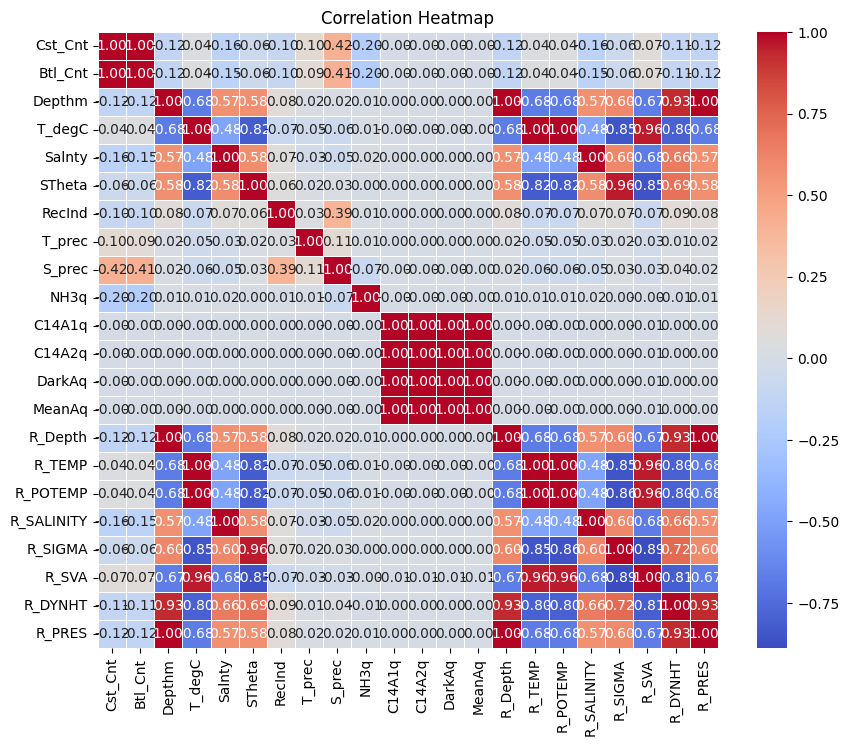

In [ ]:
# Correlation between features


plt.figure(figsize=(10,8))
sns.heatmap(bottle_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# correlation without seaborn

# df = pd.DataFrame(bottle_df)
corrM = bottle_df.corr()
corrM

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999224,-0.123269,0.040920,-0.158030,-0.059088,-0.095737,0.100194,0.415998,-0.197724,...,-0.003356,-0.003356,-0.123265,0.040923,0.041361,-0.158098,-0.062191,0.071102,-0.111903,-0.123048
Btl_Cnt,0.999224,1.000000,-0.122971,0.042337,-0.154840,-0.058956,-0.096130,0.094750,0.414659,-0.204112,...,-0.003241,-0.003241,-0.122968,0.042341,0.042768,-0.154909,-0.062076,0.071058,-0.112167,-0.122743
Depthm,-0.123269,-0.122971,1.000000,-0.678720,0.566810,0.577632,0.084562,0.021492,0.024843,0.009143,...,0.001996,0.001996,1.000000,-0.678720,-0.681549,0.566814,0.602248,-0.672272,0.927856,0.999994
T_degC,0.040920,0.042337,-0.678720,1.000000,-0.478726,-0.815820,-0.070713,-0.045755,-0.058888,0.005839,...,-0.004508,-0.004508,-0.678718,1.000000,0.999950,-0.478720,-0.850932,0.962609,-0.796260,-0.677391
Salnty,-0.158030,-0.154840,0.566810,-0.478726,1.000000,0.579576,0.067181,-0.026632,-0.053060,0.023876,...,0.003997,0.003997,0.566809,-0.478727,-0.480241,1.000000,0.604805,-0.679626,0.659835,0.565652
STheta,-0.059088,-0.058956,0.577632,-0.815820,0.579576,1.000000,0.063690,0.023134,0.028609,0.002202,...,0.004410,0.004410,0.577633,-0.815821,-0.820084,0.579571,0.958794,-0.851646,0.692621,0.576397
RecInd,-0.095737,-0.096130,0.084562,-0.070713,0.067181,0.063690,1.000000,0.033684,0.388629,0.014167,...,0.002643,0.002643,0.084563,-0.070713,-0.070896,0.067194,0.066045,-0.072906,0.090808,0.084435
T_prec,0.100194,0.094750,0.021492,-0.045755,-0.026632,0.023134,0.033684,1.000000,0.105959,0.012922,...,0.000349,0.000349,0.021492,-0.045755,-0.045710,-0.026627,0.024149,-0.027831,0.014055,0.021522
S_prec,0.415998,0.414659,0.024843,-0.058888,-0.053060,0.028609,0.388629,0.105959,1.000000,-0.070384,...,-0.001899,-0.001899,0.024844,-0.058886,-0.058823,-0.053088,0.029604,-0.032509,0.040551,0.024862
NH3q,-0.197724,-0.204112,0.009143,0.005839,0.023876,0.002202,0.014167,0.012922,-0.070384,1.000000,...,-0.000303,-0.000303,0.009143,0.005827,0.005784,0.023859,0.001839,-0.002894,-0.008465,0.009018


<Figure size 1500x1000 with 0 Axes>

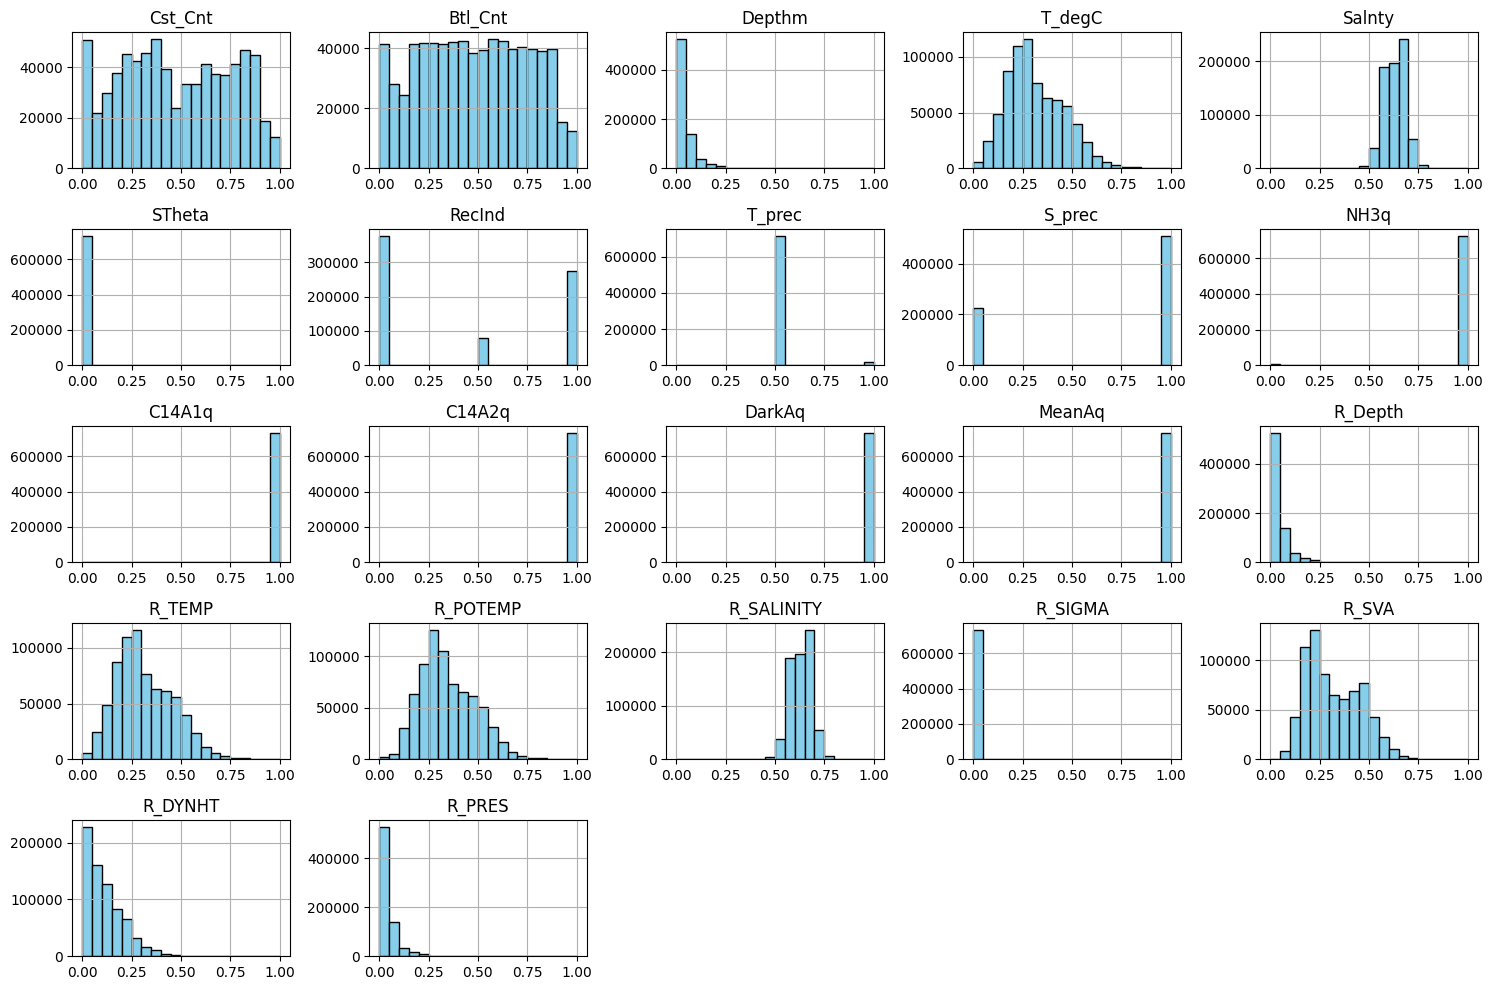

In [ ]:
# histogram of all columns in new DF

plt.figure(figsize=(15,10))
bottle_df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.tight_layout()

## Model Training

In [ ]:
df = bottle_df

In [ ]:
# there are 4 different columns that represent temperature
# we may choose any one of them and use that as a target value

y1 = df[["T_degC"]]
# y2 = df.loc[:, 'R_TEMP']
# y3 = df.loc[:, 'R_POTEMP']
# y4 = df.loc[:, 'T_prec']
y1.shape

(733418, 1)

In [ ]:
# dropping all the possible target values
X = df
print(X.shape)
# bottle_df.drop(['T_degC','R_TEMP','R_POTEMP','T_prec'],axis=1,inplace=True)
bottle_df.drop(['T_degC'],axis=1,inplace=True)
print(X.shape)

(733418, 22)
(733418, 21)


In [ ]:
# doing the test train split manually

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    split_index = int(len(X) * (1 - test_size))

    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_val, t_train, t_val = train_test_split(X, y1, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_val.shape, t_train.shape, t_val.shape

((550063, 21), (183355, 21), (550063, 1), (183355, 1))

In [ ]:
# Function to initialize weights and bias
def init_params(n_features):
    # Initialize weight vector W with zeros, with dimensions (n_features, 1)
    W = np.zeros((n_features, 1))

    # Initialize bias term b as 0
    b = 0
    return W, b

# function to compute the output y_pred = X * W + b
def compute(W, b, X):
    return np.dot(X, W) + b

# function to calculate mean squared error (MSE) loss
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# function to update parameters using gradient descent
def update_params(W, b, learning_rate, dw, db):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return W, b

# function to train the model (gradient descent)
def train(X, y, learning_rate, epochs):
    # Initialize weights and bias
    W, b = init_params(X.shape[1])
    for i in range(epochs):
        # compute predictions using the current W and b
        y_pred = compute(W, b, X)

        # calculate the current loss (MSE)
        loss_value = loss(y, y_pred)

        # Compute the gradients for W and b
        # dw is the derivative of the loss function with respect to W
        dw = 2 * np.dot(X.T, (y_pred - y)) / X.shape[0]

        # db is the derivative of the loss function with respect to b
        db = 2 * np.sum(y_pred - y) / X.shape[0]

        # update the parameters W and b using the gradients
        W, b = update_params(W, b, learning_rate, dw, db)

        # print the loss every 100 epochs for monitoring progress
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss_value}")

    # return the optimized weights and bias after training
    return W, b

# function to make predictions using the trained model
def predict(X, W, b):
    return compute(W, b, X)


In [ ]:
# training the model

W_, b_ = train(X_train.values, t_train.values, 0.001, 5000)

Epoch 0, Loss: 0.12044436364331054
Epoch 100, Loss: 0.024473546673984933
Epoch 200, Loss: 0.02035045591302065
Epoch 300, Loss: 0.019561190409737444
Epoch 400, Loss: 0.018922078365441283
Epoch 500, Loss: 0.01831639972554606
Epoch 600, Loss: 0.017737897055488967
Epoch 700, Loss: 0.017184494378364053
Epoch 800, Loss: 0.01665445292329458
Epoch 900, Loss: 0.01614621131802843
Epoch 1000, Loss: 0.01565836080311717
Epoch 1100, Loss: 0.01518962758816913
Epoch 1200, Loss: 0.01473885747602527
Epoch 1300, Loss: 0.01430500233531108
Epoch 1400, Loss: 0.013887108191693047
Epoch 1500, Loss: 0.013484304741141836
Epoch 1600, Loss: 0.013095796112649567
Epoch 1700, Loss: 0.012720852728876741
Epoch 1800, Loss: 0.012358804131662118
Epoch 1900, Loss: 0.012009032655534772
Epoch 2000, Loss: 0.011670967846598278
Epoch 2100, Loss: 0.011344081536651895
Epoch 2200, Loss: 0.011027883493385173
Epoch 2300, Loss: 0.010721917577116163
Epoch 2400, Loss: 0.010425758343002979
Epoch 2500, Loss: 0.010139008035086387
Epoch 2

## Model Evaluation

In [ ]:
vals = predict(X_val, W_, b_)
a = t_val.to_numpy()

In [ ]:
r2_score(t_val, vals)

0.7602124998476043

In [ ]:
# Accuracy


correct_predictions = np.sum(np.abs(a - vals) <= 0.1)
total_predictions = len(a)
accuracy = (correct_predictions / total_predictions) * 100
accuracy

# from sklearn import metrics
# metrics.accuracy_score(t_val, vals)


93.13135720323962

In [ ]:
# MSE


n = len(t_val)
mse = np.sum((a - vals) ** 2) / n
mse

0.003740508729594888

In [ ]:
# Evaluating the model's performance using R-squared error


def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)

    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    return r2
a = t_val.to_numpy()
r2 = r2_score_manual(a, vals)
print(f"R^2 score: {r2}")

R^2 score: 0.7602124998476043
